In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import soundcard as sc
from scipy.io import wavfile
from IPython.display import Audio

In [57]:
#Funcion para generar chirp
def generate_chirp(f0, f1, duration, fs):
    """
    Crea una señal chirp con frecuencia inicial f0, frecuencia final f1,
    duración duration y frecuencia de muestreo fs.
    """
    t = np.arange(0, duration, 1/fs)
    phi = 2*np.pi*(f0*t + ((f1-f0)/(2*duration))*t**2)
    return np.sin(phi)

# Fuvion para scalar la señal al rango de valores que pueden almacenarse en un archivo de audio
def scale_signal_to_audio(signal_):
     return np.int16(signal_ / np.max(np.abs(signal_)) * 32767)

# Graficación de la señal chirp
def plot_signal(t,signal_, title): 
    fig = plt.figure(figsize=(25, 6))
    plt.plot(t, signal_)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.title(title)
    plt.show()    
    

#Función para plotear la PDS de una señal 
def plot_pwelch(signal_,fs , nperseg, noverlap, title):
    f, Pxx = signal.welch(signal_, fs, nperseg=nperseg, noverlap=noverlap)
    Pxx_dB = 20 * np.log10(Pxx)
    plt.plot(f,Pxx_dB)
    plt.title(title)
    plt.xlabel("frecuencia")
    plt.ylabel("Amplitud en dB")
    return f,Pxx_dB

#Funcion para convertir de stereo a mono
def stereo2mono(r_audio):
    canal_1, canal_2 = zip(*r_audio)
    audio_mono = np.array(canal_1)  + np.array(canal_2)    
    return audio_mono

#Funcion para scalar, salvar y plotear audio recibido despues de 
def save_and_plot_received_audio(r_audio, title, record_duration):
    scaled_r_audio = scale_signal_to_audio(r_audio)
    t = np.arange(0, record_duration, 1/fs)
    wavfile.write(f'{title}.wav', fs, scaled_r_audio)
    plot_signal(t,scaled_r_audio,f'{title}')
    return scaled_r_audio


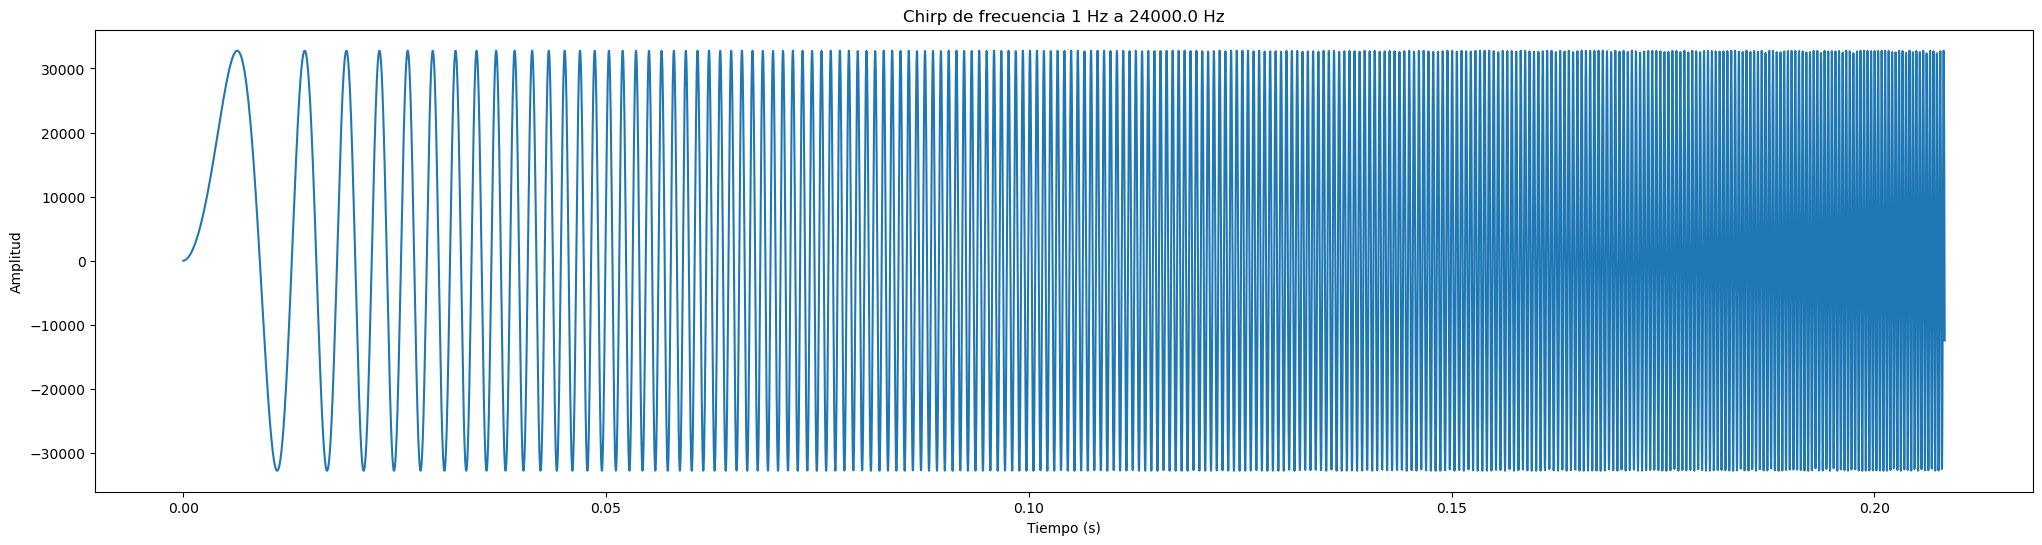

In [58]:
# Parámetros de la señal chirp
f0 = 1   # Frecuencia inicial
duration = 2  # Duración en segundos
fs = 48000    # Frecuencia de muestreo en Hz
f1 = 0.5*fs # Frecuencia final
t = np.arange(0, duration, 1/fs)

# Creación de la señal chirp
chirp = generate_chirp(f0, f1, duration, fs)
scaled_chirp = scale_signal_to_audio(chirp)
title = 'Chirp de frecuencia ' + str(f0) + ' Hz a ' + str(f1) + ' Hz'

#Graficando chirp
plot_signal(t[:10000],scaled_chirp[:10000],title)

#Guardar sennal de audio
wavfile.write('chirp.wav', fs, scaled_chirp)
Audio('chirp.wav')

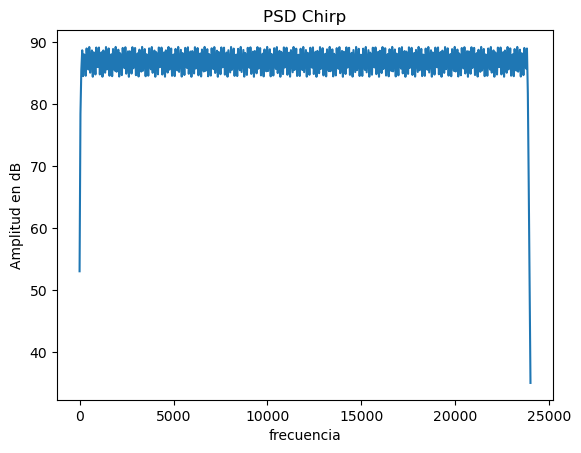

In [59]:
PSD_chirp = plot_pwelch(scaled_chirp, fs, 1024, 512, "PSD Chirp")

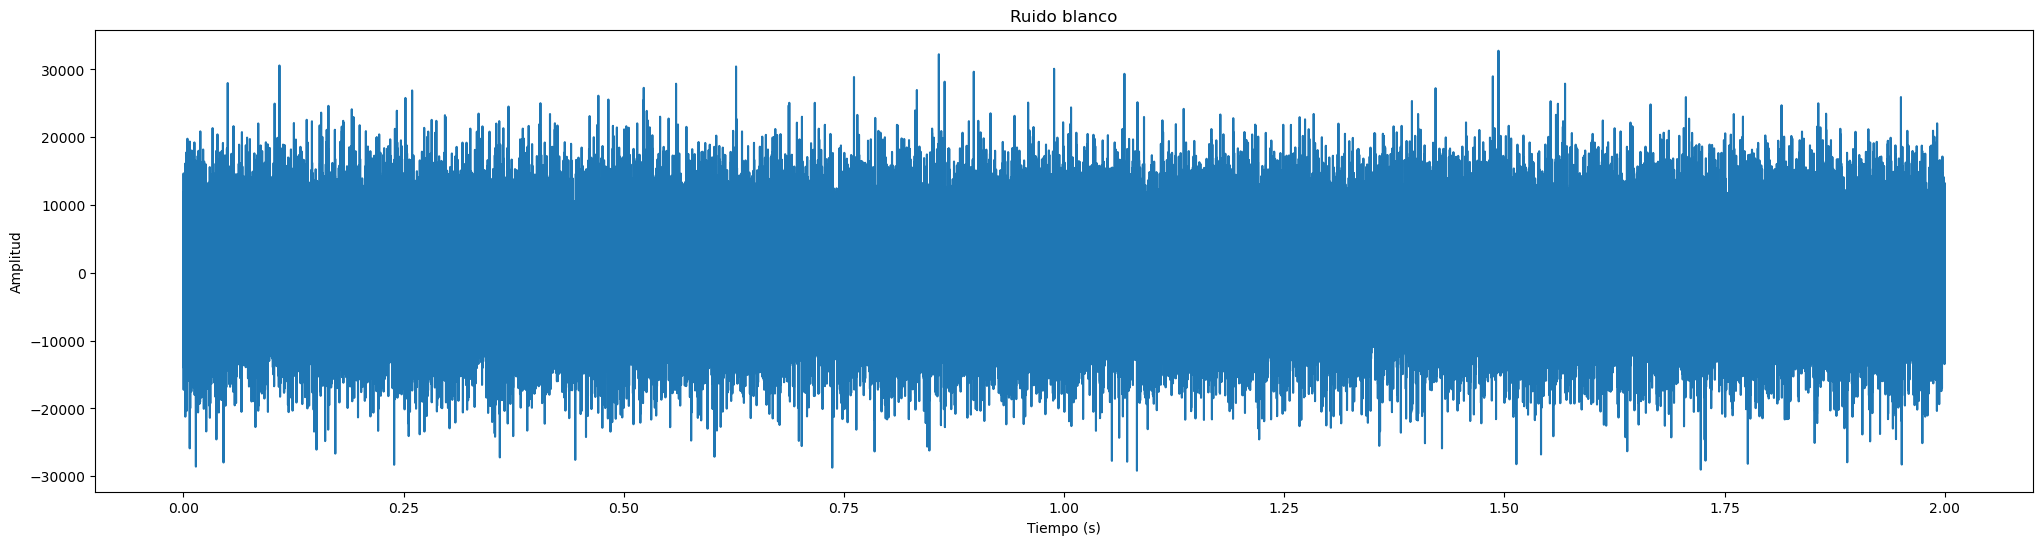

In [60]:
#Guardando y reproduciendo ruido blanco
number_samples = len(t)
white_noise = np.random.normal(0, 1, number_samples)
scaled_white_noise = scale_signal_to_audio(white_noise)
plot_signal(t,scaled_white_noise,"Ruido blanco")
wavfile.write('ruido_blanco.wav', fs, scaled_white_noise)
Audio('ruido_blanco.wav')

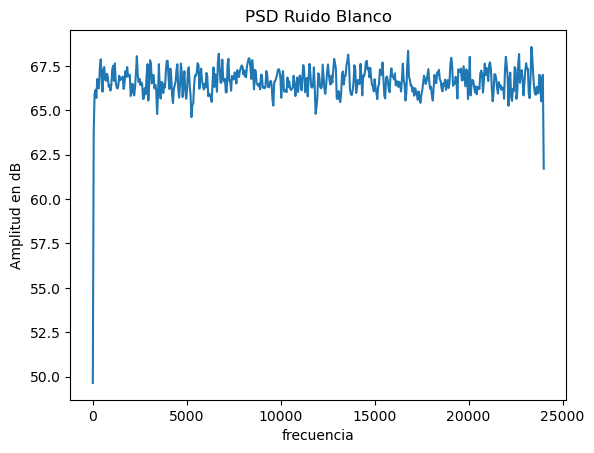

In [61]:
PSD_wn = plot_pwelch(scaled_white_noise, fs, 1024,512, "PSD Ruido Blanco")

In [62]:
record_duration = 5 #escucha de 5 seg de grabacion

#Recibiendo chrip
default_mic = sc.default_microphone()
default_speaker = sc.default_speaker()

In [8]:
#Recibiendo sennal de audio del chirp
r_chirp = default_mic.record(samplerate=fs, numframes= fs*record_duration) 

In [9]:
#comprobando que se escuche
default_speaker.play(r_chirp/np.max(r_chirp), samplerate=fs)

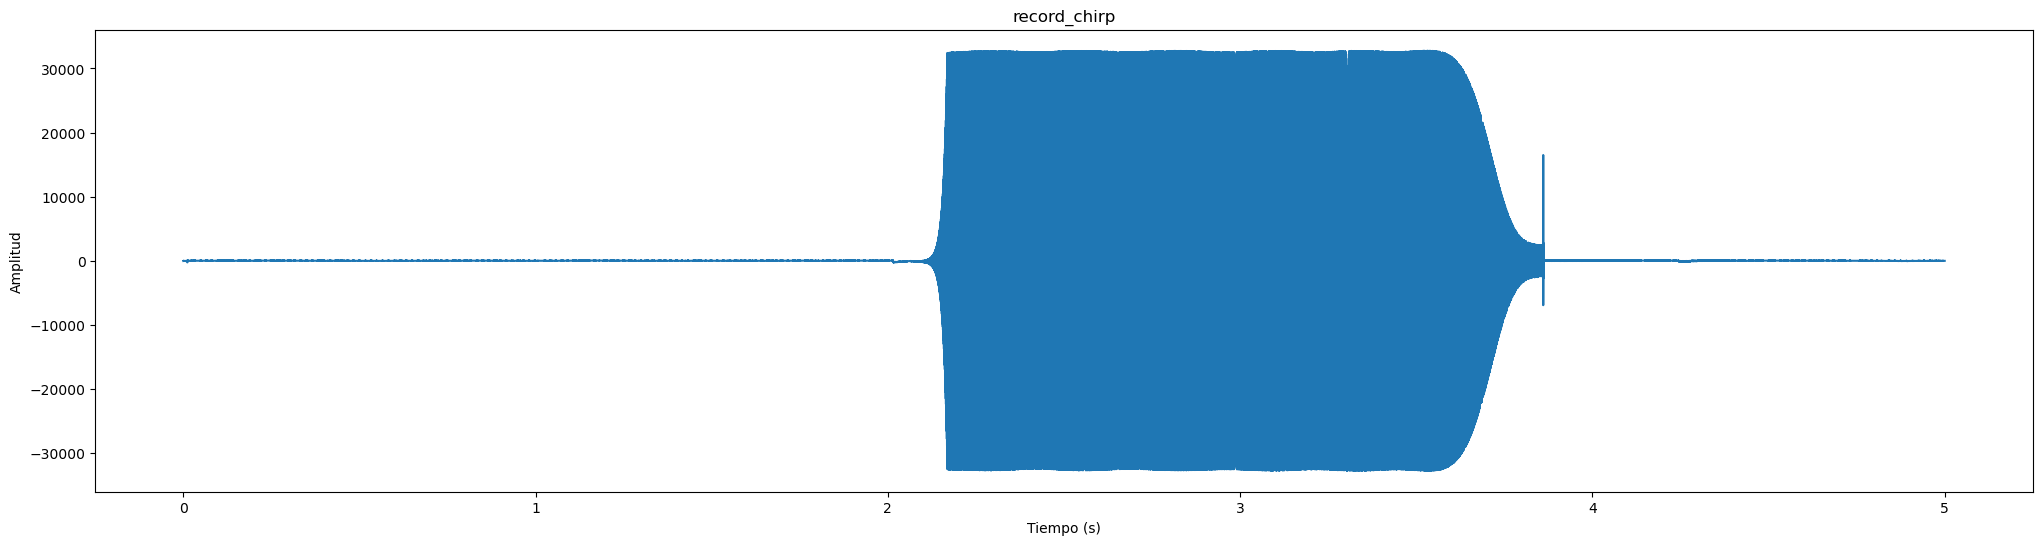

In [13]:
#Convirtiendo, guardando y ploteando a mono la sennal recibida 
r_chirp_mono = stereo2mono(r_chirp)
scaled_r_chirp  = save_and_plot_received_audio(r_chirp_mono, 'record_chirp', record_duration)
Audio('record_chirp.wav')

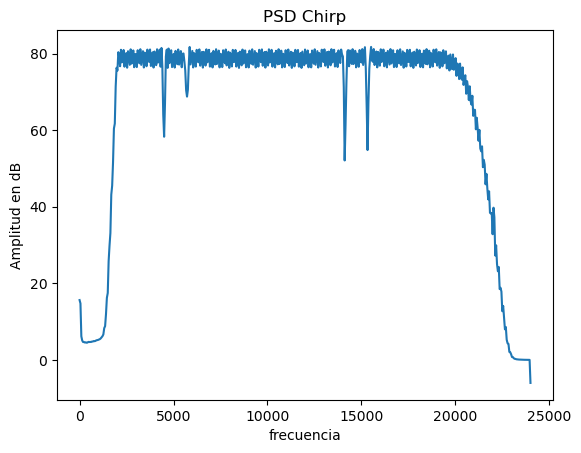

In [50]:
PSD_record_chirp = plot_pwelch(scaled_r_chirp, fs, 1024, 512, "PSD Chirp")

In [15]:
#Recibiendo sennal de audio del ruido blanco
r_white_noise = default_mic.record(samplerate=fs, numframes= fs*record_duration) 

In [16]:
default_speaker.play(r_white_noise/np.max(r_white_noise), samplerate=fs)

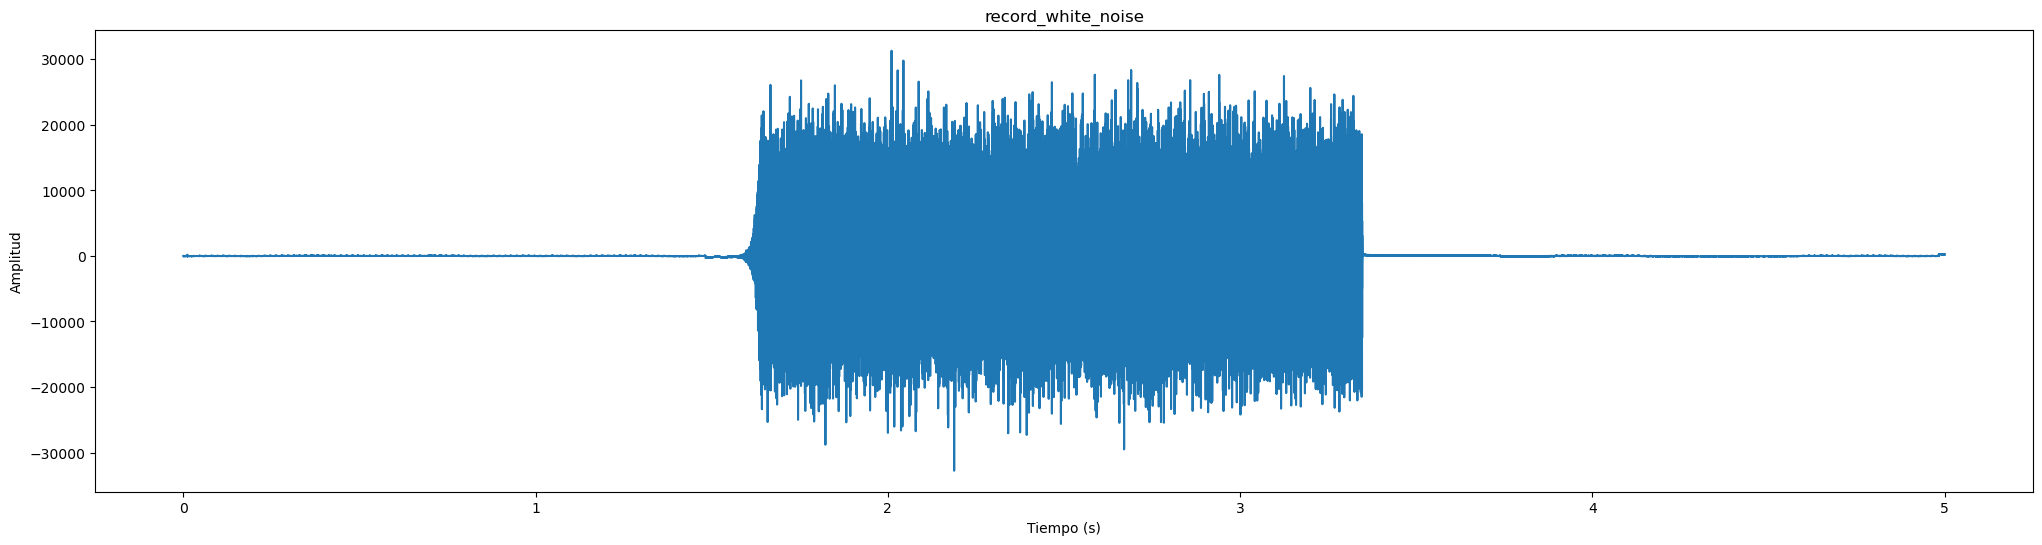

In [40]:
#Convirtiendo, guardando y ploteando a mono la sennal recibida 
r_white_noise_mono = stereo2mono(r_white_noise)
scaled_r_white_noise = save_and_plot_received_audio(r_white_noise_mono, 'record_white_noise', record_duration)


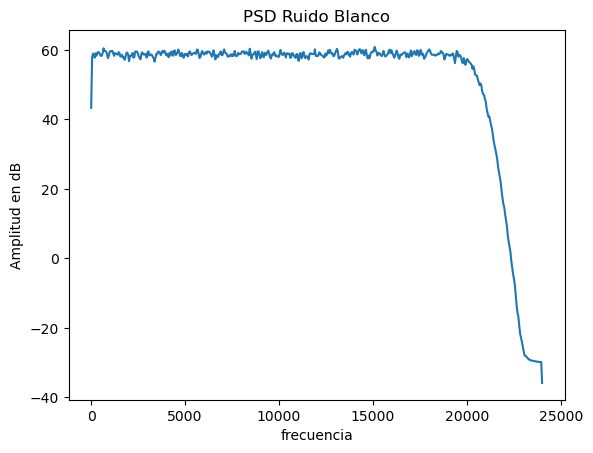

In [51]:
PSD_record_wn = plot_pwelch(scaled_r_white_noise, fs, 1024,512, "PSD Ruido Blanco")

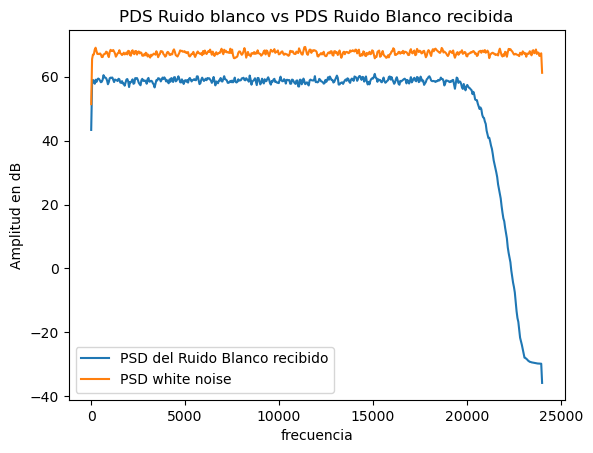

In [55]:
# Grafico de PDS Ruido blanco vs PDS Ruido Blanco recibida
plt.plot(PSD_record_wn[0], PSD_record_wn[1], label='PSD del Ruido Blanco recibido')
plt.plot(PSD_wn[0], PSD_wn[1], label='PSD white noise')

#Ejes y titulo
plt.legend()
plt.xlabel('frecuencia')
plt.ylabel('Amplitud en dB')
plt.title('PDS Ruido blanco vs PDS Ruido Blanco recibida')

# Mostramos el gráfico
plt.show()

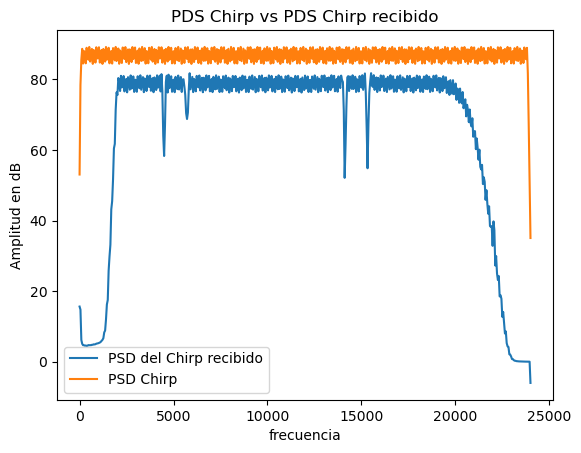

In [56]:
# Grafico de PDS Ruido blanco vs PDS Ruido Blanco recibida
plt.plot(PDS_record_chirp[0], PDS_record_chirp[1], label='PSD del Chirp recibido')
plt.plot(PDS_chirp[0], PDS_chirp[1], label='PSD Chirp')

#Ejes y titulo
plt.legend()
plt.xlabel('frecuencia')
plt.ylabel('Amplitud en dB')
plt.title('PDS Chirp vs PDS Chirp recibido')

# Mostramos el gráfico
plt.show()